In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import re
import pickle
from os import path
import pandas as pd
import numpy as np

In [ ]:
!unzip /content/light_novel.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: light_novel/City_Series/Volume6/City_Series_Volume6_output/City_Series_Volume6.tokens  
  inflating: __MACOSX/light_novel/City_Series/Volume6/City_Series_Volume6_output/._City_Series_Volume6.tokens  
  inflating: light_novel/City_Series/Volume6/City_Series_Volume6_output/City_Series_Volume6.entities  
  inflating: __MACOSX/light_novel/City_Series/Volume6/City_Series_Volume6_output/._City_Series_Volume6.entities  
  inflating: light_novel/Maru-MA/Volume3/Maru-MA_Volume3_output/Maru-MA_Volume3.entities  
  inflating: __MACOSX/light_novel/Maru-MA/Volume3/Maru-MA_Volume3_output/._Maru-MA_Volume3.entities  
  inflating: light_novel/Maru-MA/Volume3/Maru-MA_Volume3_output/Maru-MA_Volume3.book  
  inflating: __MACOSX/light_novel/Maru-MA/Volume3/Maru-MA_Volume3_output/._Maru-MA_Volume3.book  
  inflating: light_novel/Maru-MA/Volume3/Maru-MA_Volume3_output/Maru-MA_Volume3.tokens  
  inflating: __MACOSX/light_novel/Maru-MA/Volume3/Maru-MA_Volume3_output/._M

## create a dataframe with information of the novel series

In [ ]:
!rm -rf /content/Hikaru_ga_Chikyuu_ni_Itakoro

In [ ]:
!cd /content/light_novel

In [ ]:
!rmdir /content/light_novel/.ipynb_checkpoints
!rmdir /content/light_novel/.DS_Store
!find . -name ".DS_Store" -delete
series_list = sorted(os.listdir("light_novel"))
power = pd.DataFrame(columns = ["name","gender","power1","power2","power3","power4","power5","series_name","volume_name","genre"])


rmdir: failed to remove '/content/light_novel/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/light_novel/.DS_Store': Not a directory


In [ ]:
series_list = ['A_Simple_Survey',
 'Absolute_Duo',
 'Anohana:_The_Flower_We_Saw_That_Day',
 'Apocalypse_Witch',
 'Baka_to_Test_to_Shoukanjuu',
 'BlazBlue',
 'Chrome_Shelled_Regios',
 'City_Series',
 'Cute_Kunoichis',
 'Dai_Densetsu_no_Y%C5%ABsha_no_Densetsu',
 'Dantalian_no_Shoka',
 'Denpa_Onna_to_Seishun_Otoko',
 'Ghost_Hunt',
 'Godhorn_Tech',
 'Golden_Time',
 'Gundam_Unicorn',
 'HEAVY_OBJECT',
 'Hagure_Yuusha_no_Aesthetica',
 'Hanbun_no_Tsuki_ga_Noboru_Sora',
 'Hikaru_ga_Chikyuu_ni_Itakoro......',
 'Hyouka',
 'Kami-sama_no_Inai_Nichiyoubi',
 'Kamisama_no_Memochou',
 'Kanon',
 'Kara_no_Kyoukai',
 'Kaze_no_Stigma',
 'Kino_no_Tabi',
 'Madan_no_Ou_to_Vanadis',
 'Magika_No_Kenshi_To_Shoukan_Maou',
 'Maou_na_Ore_to_Fushihime_no_Yubiwa',
 'Maria-sama_ga_Miteru',
 'Maru-MA',
 'Masou_Gakuen_HxH',
 'Mimizuku_to_Yoru_no_Ou',
 'Mondaiji-tachi_ga_isekai_kara_kuru_soudesu_yo',
 'Monster_Hunter',
 'Nogizaka_Haruka_no_Himitsu',
 'Omae_o_Otaku_ni_Shiteyaru_kara,_Ore_o_Riajuu_ni_Shitekure!',
 'Onii-chan_Dakedo_Ai_Sae_Areba_Kankei_Nai_yo_ne%E2%80%94',
 'Ore,_Twintail_ni_Narimasu',
 'Ore_no_Kanojo_to_Osananajimi_ga_Shuraba_Sugiru',
 'Ore_no_Nounai_Sentakushi_ga,_Gakuen_Love_Come_o_Zenryoku_de_Jama_Shiteiru',
 'PuiPui',
 'Rakuin_no_Monshou',
 'Rental_Magica',
 'SOLARIS_the_Abyssal',
 'Seikoku_no_Ryuu_Kishi',
 'Shinmai_Maou_no_Keiyakusha',
 'Sorcery_Hacker',
 'Strike_Witches',
 'The_Circumstances_Leading_to_Waltraute%27s_Marriage',
 'The_Unexplored_Summon_Blood_Sign',
 'The_World_God_Only_Knows',
 'Toaru_Majutsu_no_Index:_Genesis_Testament',
 'Tsurugi_no_Joou_to_Rakuin_no_Ko',
 'White_Album_2_Omake']

In [ ]:
def get_num_volumes(series):
  volume_list = os.listdir(f"/content/light_novel/{series}")
  volume_list = [i for i in volume_list if i.startswith('Volume')]
  return len(volume_list)

In [ ]:
my_dict = pickle.load(open('/content/all_dict.pickle', 'rb'))
series_dict = {}
for novel in series_list:
  series_dict[novel] = my_dict[novel]["genre"]



In [ ]:
data_items = series_dict.items()
data_list = list(data_items)

series_df = pd.DataFrame(data_list)
series_df.columns = ["novel","genre"]

In [ ]:
series_df = series_df.join(pd.get_dummies(series_df.genre.explode()).sum(level=0))

In [ ]:
x = np.zeros(56)
series_df["num_volume"] = x
series_df

,novel,genre,Action,Adventure,Comedy,Drama,Ecchi,Fantasy,Harem,Horror,Josei,Mature,Mystery,Psychological,Romance,Sci-Fi,Shoujo,Slice of Life,Supernatural,num_volume
0,A_Simple_Survey,"[Fantasy, Sci-Fi, Supernatural]",0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0.0
1,Absolute_Duo,"[Action, Ecchi, Harem, Romance, Supernatural]",1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0.0
2,Anohana:_The_Flower_We_Saw_That_Day,"[Comedy, Drama, Josei, Mystery, Romance, Super...",0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0.0
3,Apocalypse_Witch,"[Action, Supernatural]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
4,Baka_to_Test_to_Shoukanjuu,"[Comedy, Romance]",0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0
5,BlazBlue,"[Action, Fantasy]",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0
6,Chrome_Shelled_Regios,"[Action, Fantasy, Romance, Sci-Fi, Supernatural]",1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0.0
7,City_Series,"[Fantasy, Sci-Fi]",0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0
8,Cute_Kunoichis,"[Action, Supernatural]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0
9,Dai_Densetsu_no_Y%C5%ABsha_no_Densetsu,"[Action, Fantasy]",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
for i in range(len(series_df)):

  the_series = series_df.iloc[i,0]
  series_df.iloc[i,19] = get_num_volumes(the_series)

series_df

,novel,genre,Action,Adventure,Comedy,Drama,Ecchi,Fantasy,Harem,Horror,Josei,Mature,Mystery,Psychological,Romance,Sci-Fi,Shoujo,Slice of Life,Supernatural,num_volume
0,A_Simple_Survey,"[Fantasy, Sci-Fi, Supernatural]",0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1.0
1,Absolute_Duo,"[Action, Ecchi, Harem, Romance, Supernatural]",1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,6.0
2,Anohana:_The_Flower_We_Saw_That_Day,"[Comedy, Drama, Josei, Mystery, Romance, Super...",0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,2.0
3,Apocalypse_Witch,"[Action, Supernatural]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0
4,Baka_to_Test_to_Shoukanjuu,"[Comedy, Romance]",0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
5,BlazBlue,"[Action, Fantasy]",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.0
6,Chrome_Shelled_Regios,"[Action, Fantasy, Romance, Sci-Fi, Supernatural]",1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,8.0
7,City_Series,"[Fantasy, Sci-Fi]",0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,10.0
8,Cute_Kunoichis,"[Action, Supernatural]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0
9,Dai_Densetsu_no_Y%C5%ABsha_no_Densetsu,"[Action, Fantasy]",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9.0


## summarize the distribution of different genres and plot it:

In [ ]:
category_df = {}
for cat in series_df.columns.values[2:-1]:
  a = series_df[cat]*series_df["num_volume"]
  category_df[cat] = a.sum()

In [ ]:
data_items = category_df.items()
data_list = list(data_items)

category_df = pd.DataFrame(data_list)
category_df.columns = ["genre","number"]

In [ ]:
category_df

,genre,number
0,Action,155.0
1,Adventure,3.0
2,Comedy,122.0
3,Drama,93.0
4,Ecchi,69.0
5,Fantasy,139.0
6,Harem,89.0
7,Horror,13.0
8,Josei,2.0
9,Mature,27.0


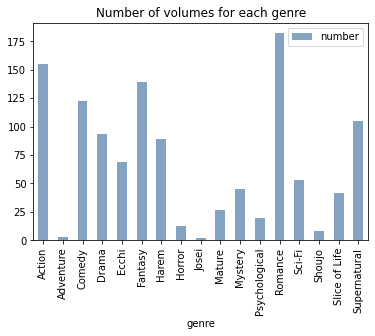

In [ ]:
import matplotlib.pyplot as plot
category_df.plot.bar(x="genre", y="number", title="Number of volumes for each genre",color=(0.2, 0.4, 0.6, 0.6));

## combine the dataframs of characters of each volume together:

In [ ]:
for series in series_list:

  #x = f"/content/light_novel/{series}/.ipynb_checkpoints"
  #z = f"/content/light_novel/{series}/.DS_Store"
  #!rmdir {x}
  #!find . -name  -delete

  volume_list = os.listdir(f"/content/light_novel/{series}")
  volume_list = [i for i in volume_list if i.startswith('Volume')]

  print(f"processing {series}")

  for volume in volume_list:
    print(f"processing {series} {volume}")

    y = f"/content/light_novel/{series}/{volume}/.ipynb_checkpoints"
    g = f"/content/light_novel/{series}/{volume}/.DS_Store"
    
    !rmdir {y}
    !rmdir {g}
    try: 
      mycsv = pd.read_csv(f"/content/light_novel/{series}/{volume}/{series}_{volume}_power_df1.csv")
      power = pd.concat([power, mycsv], ignore_index = True, axis = 0)
    except:
      continue

processing A_Simple_Survey
processing A_Simple_Survey Volume1
rmdir: failed to remove '/content/light_novel/A_Simple_Survey/Volume1/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/light_novel/A_Simple_Survey/Volume1/.DS_Store': No such file or directory
processing Absolute_Duo
processing Absolute_Duo Volume1
rmdir: failed to remove '/content/light_novel/Absolute_Duo/Volume1/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/light_novel/Absolute_Duo/Volume1/.DS_Store': No such file or directory
processing Absolute_Duo Volume5
rmdir: failed to remove '/content/light_novel/Absolute_Duo/Volume5/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/light_novel/Absolute_Duo/Volume5/.DS_Store': No such file or directory
processing Absolute_Duo Volume2
rmdir: failed to remove '/content/light_novel/Absolute_Duo/Volume2/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/light_n

In [ ]:
power

,name,gender,power1,power2,power3,power4,power5,series_name,volume_name,genre
0,Hel,she/her,/,0.428571,0.103896,-0.08,-0.192308,A_Simple_Survey,Volume1,"['Fantasy', 'Sci-Fi', 'Supernatural']"
1,Kamijou,he/him/his,0.08163265306122448,0.235294,0,0.0714286,0.423077,A_Simple_Survey,Volume1,"['Fantasy', 'Sci-Fi', 'Supernatural']"
2,Jinnai Shinobu,he/him/his,0.0,0,0.272727,0,0,A_Simple_Survey,Volume1,"['Fantasy', 'Sci-Fi', 'Supernatural']"
3,Waltraute,she/her,0.42857142857142855,0.514286,0.555556,0.217391,0.4,A_Simple_Survey,Volume1,"['Fantasy', 'Sci-Fi', 'Supernatural']"
4,Quenser,he/him/his,0,0,0,0,0,A_Simple_Survey,Volume1,"['Fantasy', 'Sci-Fi', 'Supernatural']"
...,...,...,...,...,...,...,...,...,...,...
1285,Setsuna,she/her,-0.01282051282051282,0.14473684210526316,0.148148,-1,0.05357142857142857,White_Album_2_Omake,Volume4,"['Drama', 'Romance', 'Slice of Life']"
1286,Haruki,he/him/his,0.15,0.24444444444444444,0.333333,0.22,0.0,White_Album_2_Omake,Volume4,"['Drama', 'Romance', 'Slice of Life']"
1287,Tomochika,he/him/his,/,/,-0.5,0.0967742,0.3584905660377358,White_Album_2_Omake,Volume4,"['Drama', 'Romance', 'Slice of Life']"
1288,Io,she/her,0.5,0.4,0,-0.105263,/,White_Album_2_Omake,Volume4,"['Drama', 'Romance', 'Slice of Life']"


In [ ]:
power.to_csv('/content/power_normalized.csv', index = False)

In [ ]:
# power = pd.read_csv("/content/power_normalized.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def tolist(x):
  return eval(x)

In [ ]:
power_df = pd.melt(power, id_vars=['name','gender','series_name','volume_name','genre'], 
        value_vars=['power1', 'power2', 'power3','power4','power5'],
        var_name = "stage", value_name = "power")
power_df["genre"] = power_df["genre"].apply(tolist)

In [ ]:
power_df = power_df[power_df["power"] != "/"]
power_df["power"] = pd.to_numeric(power_df["power"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
power_df = power_df.join(pd.get_dummies(power_df.genre.explode()).sum(level=0))

In [ ]:
power_df

,name,gender,series_name,volume_name,genre,stage,power,Action,Adventure,Comedy,Drama,Ecchi,Fantasy,Harem,Horror,Josei,Mature,Mystery,Psychological,Romance,Sci-Fi,Shoujo,Slice of Life,Supernatural
1,Kamijou,he/him/his,A_Simple_Survey,Volume1,"[Fantasy, Sci-Fi, Supernatural]",power1,0.081633,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,Jinnai Shinobu,he/him/his,A_Simple_Survey,Volume1,"[Fantasy, Sci-Fi, Supernatural]",power1,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,Waltraute,she/her,A_Simple_Survey,Volume1,"[Fantasy, Sci-Fi, Supernatural]",power1,0.428571,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,Quenser,he/him/his,A_Simple_Survey,Volume1,"[Fantasy, Sci-Fi, Supernatural]",power1,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
5,Julie,she/her,Absolute_Duo,Volume5,"[Action, Ecchi, Harem, Romance, Supernatural]",power1,0.365217,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6444,Io,she/her,White_Album_2_Omake,Volume3,"[Drama, Romance, Slice of Life]",power5,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
6445,Setsuna,she/her,White_Album_2_Omake,Volume4,"[Drama, Romance, Slice of Life]",power5,0.053571,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
6446,Haruki,he/him/his,White_Album_2_Omake,Volume4,"[Drama, Romance, Slice of Life]",power5,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
6447,Tomochika,he/him/his,White_Album_2_Omake,Volume4,"[Drama, Romance, Slice of Life]",power5,0.358491,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


## Define a method to create plot for a given genre:

In [ ]:
def create_plot(df,genre):

  df = df[df[genre] ==1 ]

  female = df[df["gender"] == "she/her"]
  male = df[df["gender"] == "he/him/his"] 

  mean_female = female.groupby(['stage']).agg({'power': ['mean']})
  mean_female = mean_female.T

  mean_female["gender"] = "female"

  mean_male = male.groupby(['stage']).agg({'power': ['mean']})
  mean_male = mean_male.T

  mean_male["gender"] = "male"

  mean = pd.concat([mean_female,mean_male])
  mean = pd.melt(mean, id_vars=['gender'], 
          value_vars=['power1', 'power2', 'power3','power4','power5'],
          var_name = "stage", value_name = "power")
  
  sns.catplot("stage", "power", data = female)
  plt.yticks([-1, 0, 1])
  sns.catplot(x="stage", y="power", hue="gender",
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"],
              kind="point", data=mean)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


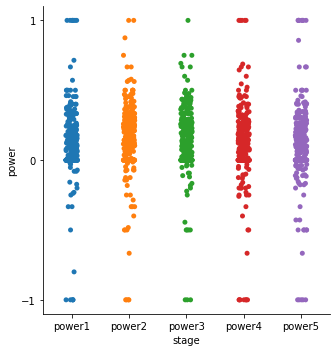

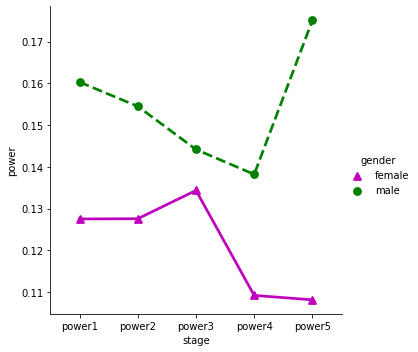

In [ ]:
create_plot(power_df, "Action")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


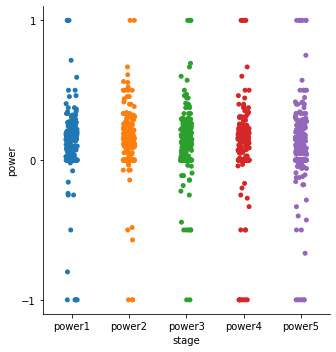

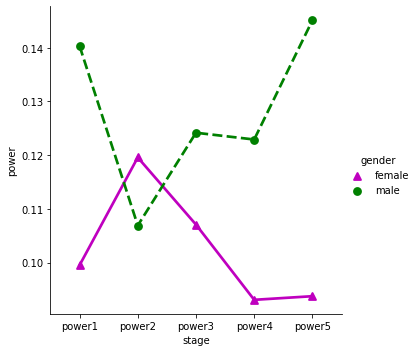

In [ ]:
create_plot(power_df, "Harem")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


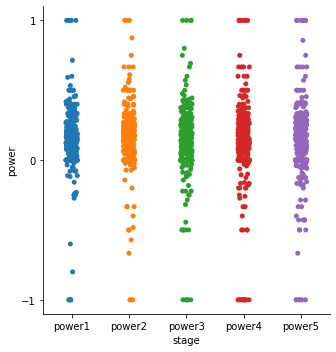

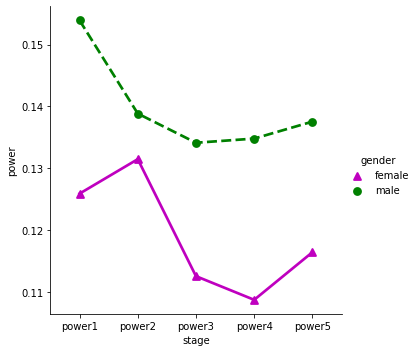

In [ ]:
create_plot(power_df, "Romance")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


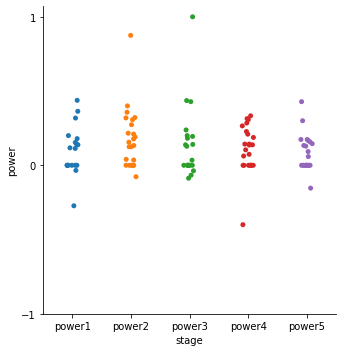

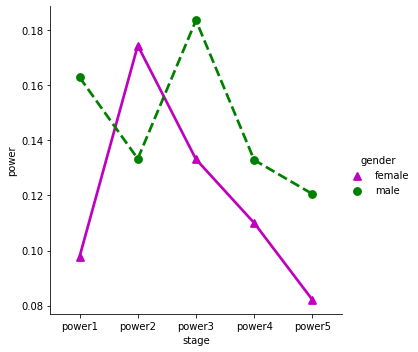

In [ ]:
create_plot(power_df, "Horror")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


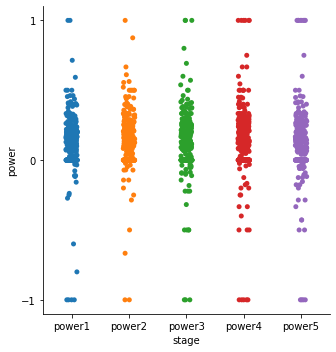

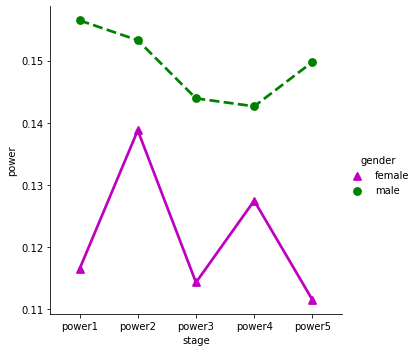

In [ ]:
create_plot(power_df, "Comedy")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


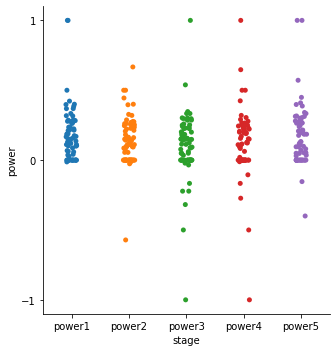

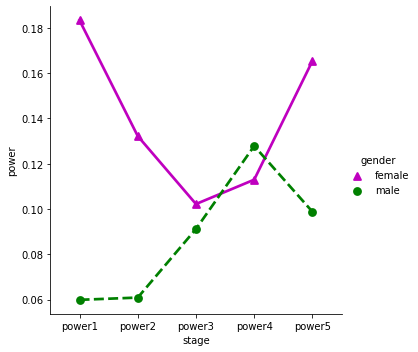

In [ ]:
create_plot(power_df, "Slice of Life")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


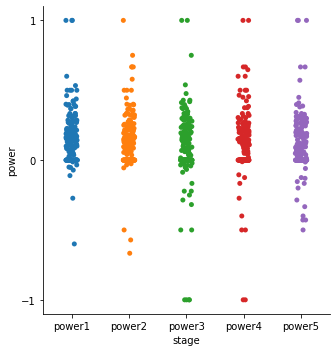

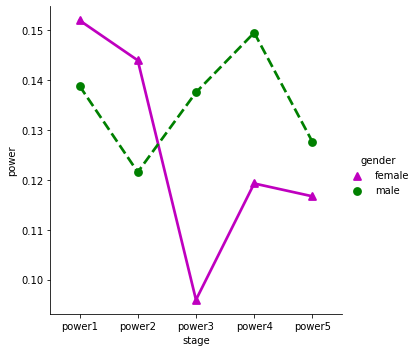

In [ ]:
create_plot(power_df, "Drama")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


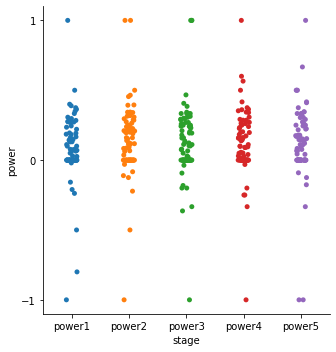

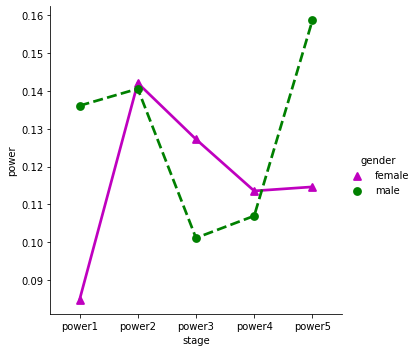

In [ ]:
create_plot(power_df, "Mature")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


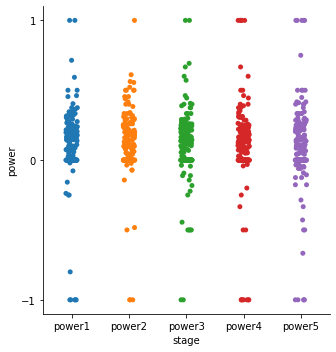

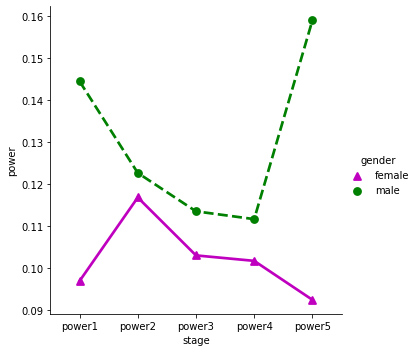

In [ ]:
create_plot(power_df, "Ecchi")

## Create plots for female and male as a whole:

In [ ]:
female = power_df[power_df["gender"] == "she/her"]
male = power_df[power_df["gender"] == "he/him/his"]

In [ ]:
mean_female = female.groupby(['stage']).agg({'power': ['mean']})
mean_female = mean_female.T
#mean_female = mean_female[:].values
mean_female["gender"] = "female"


mean_male = male.groupby(['stage']).agg({'power': ['mean']})
mean_male = mean_male.T

mean_male["gender"] = "male"
mean = pd.concat([mean_female,mean_male])
mean = pd.melt(mean, id_vars=['gender'], 
        value_vars=['power1', 'power2', 'power3','power4','power5'],
        var_name = "stage", value_name = "power")
mean

,gender,stage,power
0,female,power1,0.130094
1,male,power1,0.152642
2,female,power2,0.138469
3,male,power2,0.140252
4,female,power3,0.125165
5,male,power3,0.147931
6,female,power4,0.117294
7,male,power4,0.141519
8,female,power5,0.118891
9,male,power5,0.158588


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


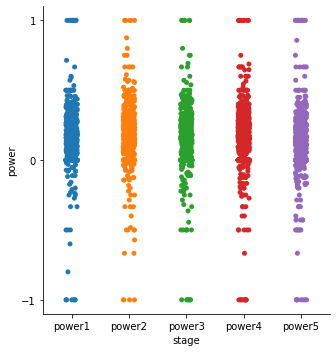

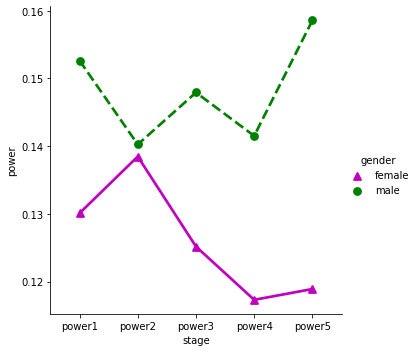

In [ ]:
sns.catplot("stage", "power", data = female)
plt.yticks([-1, 0, 1])
sns.catplot(x="stage", y="power", hue="gender",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=mean)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.YTick at 0x7fcc8718b890>,
 <a list of 3 Text major ticklabel objects>)

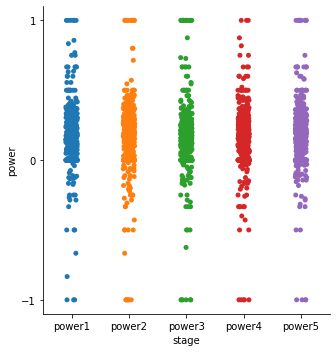

In [ ]:
sns.catplot("stage", "power", data = male)
plt.yticks([-1, 0, 1])